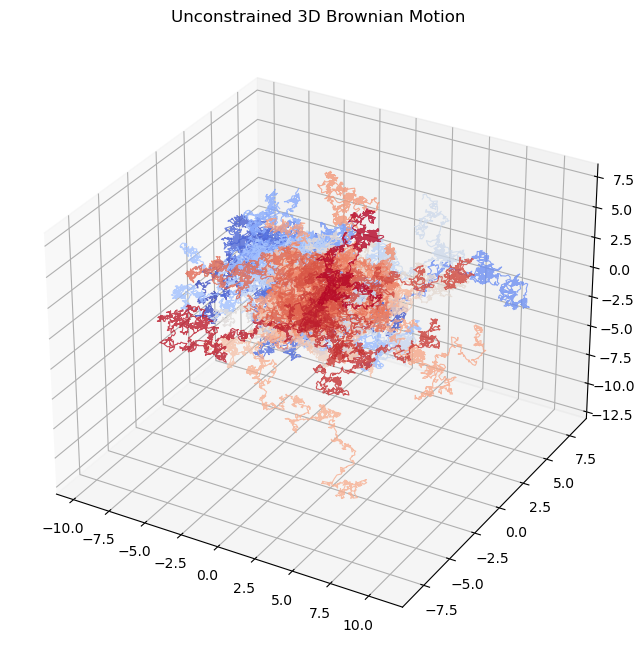

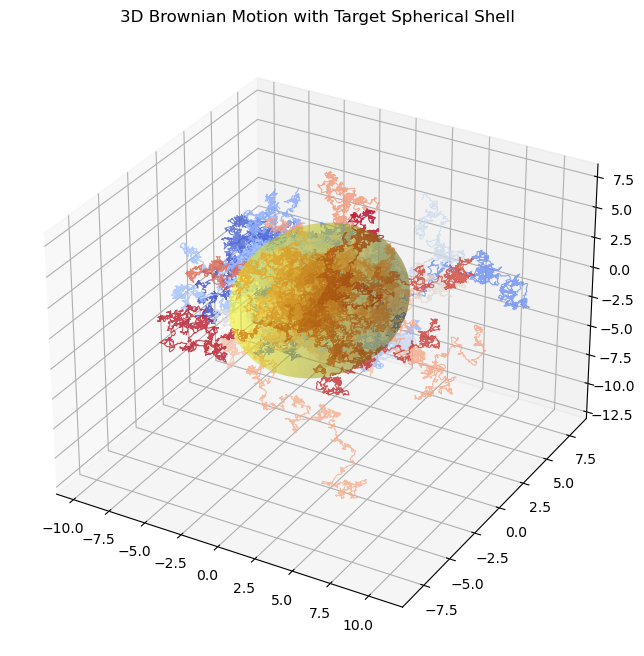

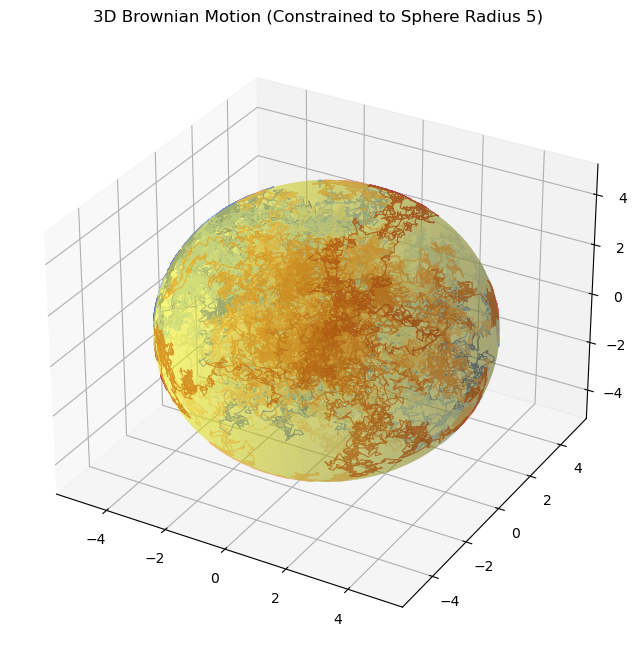

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from StochasticProcessSimulator import StochasticProcessSimulator

# Simulation parameters
num_paths = 50
path_length = 1500
dt = 0.01

# Function to plot 3D paths
def plot_3d_paths(paths, title, sphere_radius=None, constrained=False):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    cmap = plt.get_cmap('coolwarm')
    colors = cmap(np.linspace(0, 1, paths.shape[0]))
    for i in range(paths.shape[0]):
        ax.plot(paths[i, :, 0], paths[i, :, 1], paths[i, :, 2], color=colors[i], alpha=0.8, linewidth=0.8)
    
    if sphere_radius is not None:
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        x = sphere_radius * np.outer(np.cos(u), np.sin(v))
        y = sphere_radius * np.outer(np.sin(u), np.sin(v))
        z = sphere_radius * np.outer(np.ones(np.size(u)), np.cos(v))
        ax.plot_surface(x, y, z, color='yellow', alpha=0.3)
    
    if constrained:
        ax.set_title(f"{title} (Constrained to Sphere Radius {sphere_radius})")
    else:
        ax.set_title(title)
    
    plt.show()

# Function to constrain 3D Brownian motion within a sphere
def constrain_to_sphere(paths, radius):
    for path in paths:
        for i in range(path.shape[0]):
            distance = np.linalg.norm(path[i])
            if distance > radius:
                path[i] = path[i] * radius / distance
    return paths

# Initialize the simulator for 3D Brownian motion
simulator = StochasticProcessSimulator(
    process_type='dDimensionalBM', num_paths=num_paths, path_length=path_length, dt=dt, d=3
)

# Simulate unconstrained 3D Brownian motion
unconstrained_paths = simulator.simulate()

# Plot unconstrained 3D Brownian motion
plot_3d_paths(unconstrained_paths, "Unconstrained 3D Brownian Motion")

# Plot 3D Brownian motion with target spherical shell
sphere_radius = 5
plot_3d_paths(unconstrained_paths, "3D Brownian Motion with Target Spherical Shell", sphere_radius)

# Simulate 3D Brownian motion constrained within a sphere
constrained_paths = constrain_to_sphere(unconstrained_paths.copy(), sphere_radius)

# Plot constrained 3D Brownian motion
plot_3d_paths(constrained_paths, "3D Brownian Motion", sphere_radius, constrained=True)
